**LABORATORY №1**

Download the required libraries

In [44]:
import numpy as np               # Массивы (матрицы, векторы, линейная алгебра)           
import matplotlib.pyplot as plt  # Научная графика
import pandas as pd              # Таблицы и временные ряды (dataframe, series)
import seaborn as sbn            # Еще больше красивой графики для визуализации данных
import sklearn                   # Алгоритмы машинного обучения
import os

import sklearn.model_selection
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble

**Задания**
1. Описать задачу
2. Описание признаков
3. Визуализировать данные и обработать пропущенные значения
4. Вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.).
5. Обработать категориальные признаки
6. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
7. Разбить данные на обучающую и тестовую выборки
8. Запустить классификатор ближайших соседей (попробовать разное их количество) и вычислить ошибки на обучающей и тестовой выборках. 
9. Сделать общие выводы

**1. Описание задачи**

Инсульт – это нарушение кровообращения в головном мозге, вызванное закупоркой или разрывом сосудов. Это состояние, когда сгусток крови – тромб – или кровь из разорвавшегося сосуда нарушает кровоток в мозге. Недостаток кислорода и глюкозы приводит к смерти клеток мозга и нарушению двигательных функций, речи или памяти. 

Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения. Каждая строка в данных содержит соответствующую информацию о пациенте.

Базу данных можно скачать по ссылке: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**2. Описание признаков**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

**3. Визуализировать данные и обработать пропущенные значения**

As a start we visualize the dataset to understand in a general way what it is formed of.


In [2]:
url = 'https://raw.githubusercontent.com/carolinavivast/Machine-Learning-Course/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We can see the dimension of our dataset and they are 5110 rows and 12 columns.

Now we will visualize the characteristics of the dataset

In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


As we can see we have some data that is missing, so as a first step we are going to work with the skipped data.

The column smoking_status contains the values "Unknown", replace them with None.

In [4]:
data['smoking_status'].replace({'Unknown': None}, inplace=True)

We will replace the missing bmi values with median values, and in smoking_status we will fill in preserving the distribution among known records.

In [5]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)
probabilities = data['smoking_status'].value_counts(normalize=True)
missing = data['smoking_status'].isnull()
data.loc[missing, 'smoking_status'] = np.random.choice(probabilities.index, size=len(data[missing]), p=probabilities.values)

To begin with, we will delete the id column, since it does not carry any semantic load and is just an identifier of the record.

In [6]:
data.drop('id', axis=1, inplace=True)
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**4. Вычислить основные характеристики**

We will output a correlation matrix to reveal the dependence of the features among themselves

In [7]:
correlation_matrix = data.corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


<AxesSubplot:>

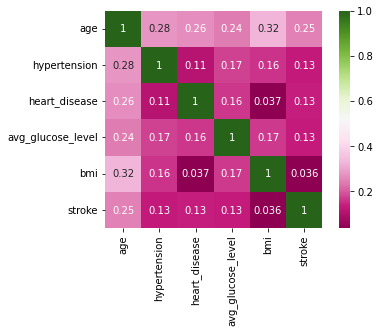

In [14]:
sbn.heatmap(correlation_matrix,annot =True, square=True, cmap="PiYG")


All correlations are natural and logical

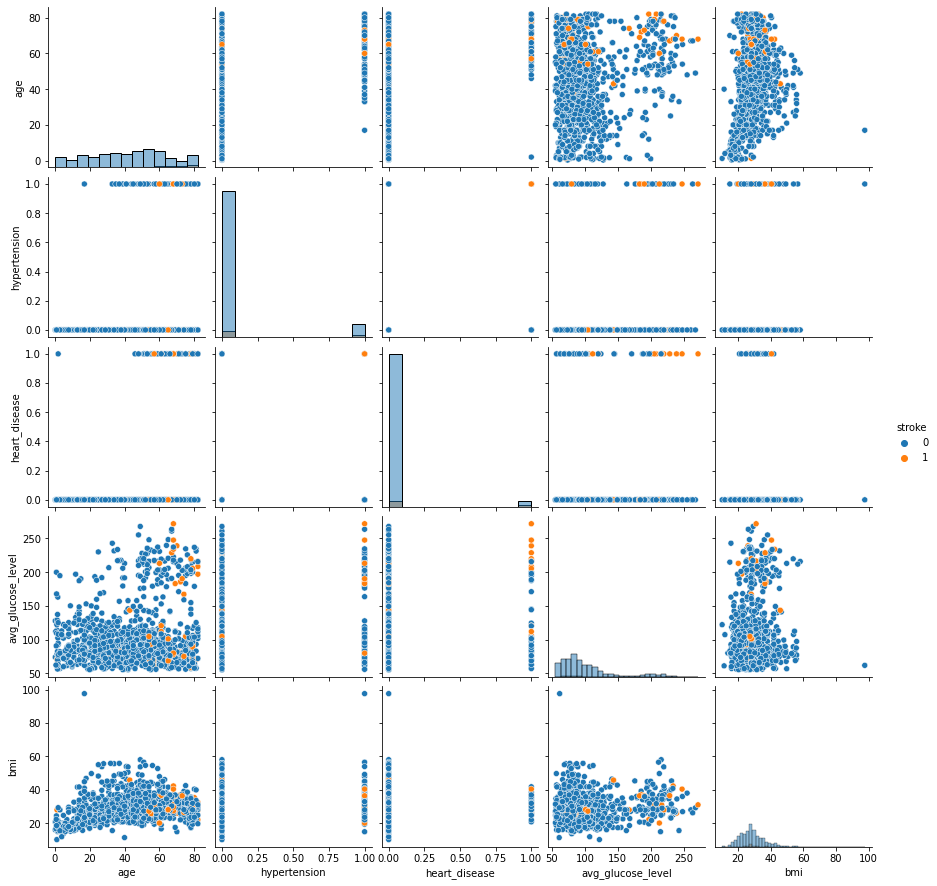

In [15]:
# построим диаграмму рассеивания относительно признака stroke
sbn.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)], hue='stroke', diag_kind='hist')

**5. Обработать категориальные признаки**

Gender, ever_married, Residence_type attributes are binary. Replace their values with 0 and 1.

gender: 0 instead of Female, 1 instead of Male

ever_married: 0 instead of No, 1 instead of Yes

Residence_type: 0 instead of Rubal, 1 instead of Urban

In [16]:
data['gender'] = np.where(data['gender'] == 'Male', 1, 0)
data['ever_married'] = np.where(data['ever_married'] == 'Yes', 1, 0)
data['Residence_type'] = np.where(data['Residence_type'] == 'Urban', 1, 0)

Categorical features are converted into binary

In [26]:
data = pd.get_dummies(data)
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,1,0,0


**6. Провести нормализацию**

Normalization will be performed by the standardization method

In [28]:
data_normalized = (data - data.mean(axis = 0)) / data.std(axis = 0)
data_normalized.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-5.561978e-17,3.893385e-17,2.780989e-18,3.615286e-17,-4.449583e-17,-9.733462e-17,1.001156e-16,-4.171484e-17,6.674374e-17,7.786770e-17,2.780989e-18,-9.733462e-17,-3.267662e-17,-1.112396e-17,-6.604849e-18,7.161047e-17,4.727682e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.402611e-01,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.381301e+00,-1.016078e+00,-1.126848e+00,-2.410791e+00,-2.263051e-01,-3.840731e-01,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-5.855789e-01,-1.033739e+00,-5.433716e-01
25%,-8.402611e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-1.381301e+00,-1.016078e+00,-6.382598e-01,-6.574445e-01,-2.263051e-01,-3.840731e-01,-6.574993e-02,-1.156897e+00,-4.368378e-01,-3.940737e-01,-5.855789e-01,-1.033739e+00,-5.433716e-01
50%,-8.402611e-01,7.842450e-02,-3.285697e-01,-2.389234e-01,7.238134e-01,9.839834e-01,-3.149637e-01,-9.897124e-02,-2.263051e-01,-3.840731e-01,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,-5.855789e-01,9.671727e-01,-5.433716e-01
75%,1.189873e+00,7.859932e-01,-3.285697e-01,-2.389234e-01,7.238134e-01,9.839834e-01,1.753909e-01,5.114531e-01,-2.263051e-01,-3.840731e-01,-6.574993e-02,8.642120e-01,-4.368378e-01,-3.940737e-01,1.707378e+00,9.671727e-01,-5.433716e-01
max,1.189873e+00,1.714677e+00,3.042899e+00,4.184622e+00,7.238134e-01,9.839834e-01,3.656787e+00,8.927516e+00,4.417948e+00,2.603162e+00,1.520617e+01,8.642120e-01,2.288731e+00,2.537100e+00,1.707378e+00,9.671727e-01,1.840001e+00


**7. Разбить данные на обучающую и тестовую выборки**

Divide the data into a training and test sample with a ratio of 3:1

In [33]:
x = data_normalized.drop(['stroke'], axis=1)
y = data['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

**8. Запустить классификатор ближайших соседей**

Number of neighbors = 2

In [37]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train: 0.9527661795407099, Test: 0.9530516431924883


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy for the test and training samples is shown above at the value of the parameter k = 2. So now we will try with 10.

Number of neighbors = 10

In [36]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train: 0.9491127348643006, Test: 0.9593114241001565


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Логистическая регрессия**

In [29]:
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))

Train: 0.9483298538622129, Test: 0.9616588419405321


**Random Forest**

In [40]:
model = sklearn.ensemble.RandomForestClassifier(n_estimators = 1000)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))
print("Train_error: {}, Test_error: {}".format((y_train != y_train_pred).mean(), (y_test != y_test_pred).mean()))


Train: 1.0, Test: 0.960093896713615
Train_error: 0.0, Test_error: 0.03990610328638498


**Extremely Randomized Trees**

In [41]:
model = sklearn.ensemble.ExtraTreesClassifier(n_estimators = 1000)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

print("Train: {}, Test: {}".format((y_train == y_train_pred).mean(), (y_test == y_test_pred).mean()))
print("Train_error: {}, Test_error: {}".format((y_train != y_train_pred).mean(), (y_test != y_test_pred).mean()))


Train: 1.0, Test: 0.9538341158059468
Train_error: 0.0, Test_error: 0.04616588419405321


In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred), end="\n\n")
print(confusion_matrix(y_test, y_test_pred), end="\n\n")

[[3634    0]
 [   0  198]]

[[1216   11]
 [  48    3]]



Наилуший результат показывает Random Forest и Extremely Randomized. Ошибка на тестовой выборке состовляет ~ 0.0. При этом, на обучение алгоритмом Extremely Randomized Trees затрачивается меньше вермени. Сonfusion matrix позволяет нам понять, что абсолютно все случаи в тренировочной выборках классифицируются правильно.

**9. Сделать общие выводы**

Видно, что с увеличение числа соседей в метод К ближайших соседей не гарантирует улучшение точности на тестовой выборке.

Также, алгоритм логистической регрессии незначительно превосходит метод ближайших соседей в точности.